# NLP With Hotel Review

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# load the data sets
df_raw = pd.read_csv('Hotel_Reviews.csv')

In [3]:
# firat look at the columns
df_raw.columns

Index(['Unnamed: 0', 'Additional_Number_of_Scoring', 'Average_Score',
       'Negative_Review', 'Review_Total_Negative_Word_Counts',
       'Total_Number_of_Reviews', 'Positive_Review',
       'Review_Total_Positive_Word_Counts',
       'Total_Number_of_Reviews_Reviewer_Has_Given', 'Reviewer_Score',
       'Days_Since_Review', 'Latitude', 'Longitude', 'Day', 'Month', 'Year',
       'Reviewer_Nationality_Australia', 'Reviewer_Nationality_Ireland',
       'Reviewer_Nationality_UAE', 'Reviewer_Nationality_UK',
       'Reviewer_Nationality_USA', 'Reviewer_Nationality_Other',
       'Hotel_Address_Amsterdam', 'Hotel_Address_Barcelona',
       'Hotel_Address_London', 'Hotel_Address_Milan', 'Hotel_Address_Paris',
       'Hotel_Address_Vienna', 'Leisure_Trip', 'Nights_Stayed'],
      dtype='object')

In [4]:
# check the info for the dataframe
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 515738 entries, 0 to 515737
Data columns (total 30 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   Unnamed: 0                                  515738 non-null  int64  
 1   Additional_Number_of_Scoring                515738 non-null  int64  
 2   Average_Score                               515738 non-null  float64
 3   Negative_Review                             515738 non-null  object 
 4   Review_Total_Negative_Word_Counts           515738 non-null  int64  
 5   Total_Number_of_Reviews                     515738 non-null  int64  
 6   Positive_Review                             515738 non-null  object 
 7   Review_Total_Positive_Word_Counts           515738 non-null  int64  
 8   Total_Number_of_Reviews_Reviewer_Has_Given  515738 non-null  int64  
 9   Reviewer_Score                              515738 non-null  int64  
 

In [6]:
# first look at the negative reviews
df_raw['Negative_Review'].value_counts().head()

Negative_Review
No Negative    127890
 Nothing        14295
 Nothing         4236
 nothing         2225
 N A             1037
Name: count, dtype: int64

In [7]:
# take brief look at first 15 columns
df_raw.iloc[:5,:15]

,Unnamed: 0,Additional_Number_of_Scoring,Average_Score,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Days_Since_Review,Latitude,Longitude,Day,Month
0,0,194,7.7,I am so angry that i made this post available...,397,1403,Only the park outside of the hotel was beauti...,11,7,0,0,52.360576,4.915968,3,8
1,1,194,7.7,No Negative,0,1403,No real complaints the hotel was great great ...,105,7,0,0,52.360576,4.915968,3,8
2,2,194,7.7,Rooms are nice but for elderly a bit difficul...,42,1403,Location was good and staff were ok It is cut...,21,9,0,3,52.360576,4.915968,31,7
3,3,194,7.7,My room was dirty and I was afraid to walk ba...,210,1403,Great location in nice surroundings the bar a...,26,1,0,3,52.360576,4.915968,31,7
4,4,194,7.7,You When I booked with your company on line y...,140,1403,Amazing location and building Romantic setting,8,3,0,10,52.360576,4.915968,24,7


In [8]:
# take brief look at last 15 columns
df_raw.iloc[:5,15:30]

,Year,Reviewer_Nationality_Australia,Reviewer_Nationality_Ireland,Reviewer_Nationality_UAE,Reviewer_Nationality_UK,Reviewer_Nationality_USA,Reviewer_Nationality_Other,Hotel_Address_Amsterdam,Hotel_Address_Barcelona,Hotel_Address_London,Hotel_Address_Milan,Hotel_Address_Paris,Hotel_Address_Vienna,Leisure_Trip,Nights_Stayed
0,2017,0,0,0,0,0,1,1,0,0,0,0,0,1,6
1,2017,0,1,0,0,0,0,1,0,0,0,0,0,1,4
2,2017,1,0,0,0,0,0,1,0,0,0,0,0,1,3
3,2017,0,0,0,1,0,0,1,0,0,0,0,0,1,3
4,2017,0,0,0,0,0,1,1,0,0,0,0,0,1,2


In [9]:
# checking for missing value
df_raw.isna().sum()

Unnamed: 0                                    0
Additional_Number_of_Scoring                  0
Average_Score                                 0
Negative_Review                               0
Review_Total_Negative_Word_Counts             0
Total_Number_of_Reviews                       0
Positive_Review                               0
Review_Total_Positive_Word_Counts             0
Total_Number_of_Reviews_Reviewer_Has_Given    0
Reviewer_Score                                0
Days_Since_Review                             0
Latitude                                      0
Longitude                                     0
Day                                           0
Month                                         0
Year                                          0
Reviewer_Nationality_Australia                0
Reviewer_Nationality_Ireland                  0
Reviewer_Nationality_UAE                      0
Reviewer_Nationality_UK                       0
Reviewer_Nationality_USA                

In [10]:
# checking for duplicated data
df_raw.duplicated().sum()

0

In [11]:
# a brief look at data target
df_raw['Reviewer_Score'].value_counts()

Reviewer_Score
1    293974
0    221764
Name: count, dtype: int64

In [13]:
good_percent, bad_percent = df_raw['Reviewer_Score'].value_counts() /df_raw.shape[0]

In [142]:
print(f'Good reviews: {good_percent * 100} %')
print(f'Bad reviews: {bad_percent * 100} %')

Good reviews: 57.000647615649804 %
Bad reviews: 42.99935238435019 %


#### The data target is almost balenced

In [14]:
# check for target count
print("Number of Unique Positive reviews: ",end="")
print(df_raw['Positive_Review'].value_counts().shape[0])
print("Number of Unique Negative reviews: ",end="")
print(df_raw['Negative_Review'].value_counts().shape[0])

Number of Unique Positive reviews: 412601
Number of Unique Negative reviews: 330011


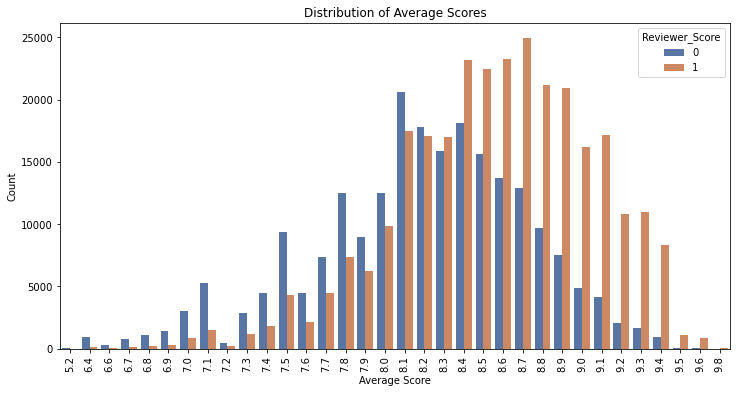

In [15]:
# Assuming df is your DataFrame and Average_Score and Reviewer_Score are the columns
plt.figure(figsize=(12, 6))  # Set the size of the plot
sns.countplot(x='Average_Score', hue='Reviewer_Score', data=df_raw, palette="deep")

plt.xlabel('Average Score')  # Set the x-axis label
plt.ylabel('Count')          # Set the y-axis label
plt.title('Distribution of Average Scores')  # Set the title of the plot

plt.xticks(rotation=90)  # Rotate the x-axis labels for better readability if needed

plt.show()



first make copy for cleaning as df_clean 

In [16]:
df_clean = df_raw

In This level for easier visalization, reverse the dummy data into categorical columns

In [18]:


# Extracting columns related to Reviewer_Nationality and Hotel_Address
reviewer_nationality_cols = [col for col in df_clean.columns if 'Reviewer_Nationality' in col]
hotel_address_cols = [col for col in df_clean.columns if 'Hotel_Address' in col]

# Function to get the category name
def get_category(row, columns):
    for col in columns:
        if row[col] == 1:
            return col.split('_')[-1]
    return None

# Apply the function to each row
df_clean['Reviewer_Nationality'] = df_clean.apply(lambda row: get_category(row, reviewer_nationality_cols), axis=1)
df_clean['Hotel_Address'] = df_clean.apply(lambda row: get_category(row, hotel_address_cols), axis=1)

#  drop the original dummy columns
df_clean.drop(reviewer_nationality_cols + hotel_address_cols, axis=1, inplace=True)


In [19]:
df_clean.head(3)

,Unnamed: 0,Additional_Number_of_Scoring,Average_Score,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Days_Since_Review,Latitude,Longitude,Day,Month,Year,Leisure_Trip,Nights_Stayed,Reviewer_Nationality,Hotel_Address
0,0,194,7.7,I am so angry that i made this post available...,397,1403,Only the park outside of the hotel was beauti...,11,7,0,0,52.360576,4.915968,3,8,2017,1,6,Other,Amsterdam
1,1,194,7.7,No Negative,0,1403,No real complaints the hotel was great great ...,105,7,0,0,52.360576,4.915968,3,8,2017,1,4,Ireland,Amsterdam
2,2,194,7.7,Rooms are nice but for elderly a bit difficul...,42,1403,Location was good and staff were ok It is cut...,21,9,0,3,52.360576,4.915968,31,7,2017,1,3,Australia,Amsterdam


Now we have columns with categorical columns

In [21]:
# remove the old index
# Remove the 'Unnamed: 0' column from the DataFrame
df_clean.drop('Unnamed: 0', axis=1, inplace=True)

## Data Dictionary

| Column Name                                  | Description                                               | Type       |
| -------------------------------------------- | --------------------------------------------------------- | ---------- |
| Additional_Number_of_Scoring                 | Number of scores given without an accompanying review.    | int64      |
| Average_Score                                | Average score of the hotel, calculated based on the latest comments in the last year. | float64    |
| Negative_Review                              | Text of the negative review given by the reviewer. 'No Negative' if no negative review is given. | object     |
| Review_Total_Negative_Word_Counts            | Total number of words in the negative review.             | int64      |
| Total_Number_of_Reviews                      | Total number of valid reviews the hotel has received.     | int64      |
| Positive_Review                              | Text of the positive review given by the reviewer. 'No Positive' if no positive review is given. | object     |
| Review_Total_Positive_Word_Counts            | Total number of words in the positive review.             | int64      |
| Total_Number_of_Reviews_Reviewer_Has_Given   | Number of reviews the reviewer has given in the past.     | int64      |
| Reviewer_Score                               | Score the reviewer has given to the hotel, based on his/her experience. | int64      |
| Days_Since_Review                            | Duration between the review date and scrape date.         | int64      |
| Latitude                                     | Geographical latitude of the hotel.                       | float64    |
| Longitude                                    | Geographical longitude of the hotel.                      | float64    |
| Day                                          | Day of the month when the review was posted.              | int64      |
| Month                                        | Month when the review was posted.                         | int64      |
| Year                                         | Year when the review was posted.                          | int64      |
| Leisure_Trip                                 | Indicates whether the trip was for leisure (1) or not (0).| int64      |
| Nights_Stayed                                | Number of nights the reviewer stayed in the hotel.        | int64      |
| Reviewer_Nationality                         | Nationality of the reviewer.                              | object     |
| Hotel_Address                                | Address of the hotel.                                     | object     |


In [22]:
df_clean.describe()

,Additional_Number_of_Scoring,Average_Score,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Days_Since_Review,Latitude,Longitude,Day,Month,Year,Leisure_Trip,Nights_Stayed
count,515738.000000,515738.000000,515738.000000,515738.000000,515738.000000,515738.000000,515738.000000,515738.000000,515738.000000,515738.000000,515738.000000,515738.000000,515738.000000,515738.000000,515738.000000
mean,498.081836,8.397487,18.539450,2743.743944,17.776458,7.166001,0.570006,354.441932,49.432419,2.893479,15.680221,6.486660,2016.120761,0.810059,2.362122
std,500.538467,0.548048,29.690831,2317.464868,21.804185,11.040228,0.495075,208.928124,3.460237,4.667477,8.864491,3.351779,0.687567,0.392255,1.646808
min,1.000000,5.200000,0.000000,43.000000,0.000000,1.000000,0.000000,0.000000,41.328376,-0.369758,1.000000,1.000000,2015.000000,0.000000,1.000000
25%,169.000000,8.100000,2.000000,1161.000000,5.000000,1.000000,0.000000,175.000000,48.214066,-0.143372,8.000000,4.000000,2016.000000,1.000000,1.000000
50%,341.000000,8.400000,9.000000,2134.000000,11.000000,3.000000,1.000000,353.000000,51.499981,0.019886,16.000000,7.000000,2016.000000,1.000000,2.000000
75%,660.000000,8.800000,23.000000,3613.000000,22.000000,8.000000,1.000000,527.000000,51.516288,4.841163,23.000000,9.000000,2017.000000,1.000000,3.000000
max,2682.000000,9.800000,408.000000,16670.000000,395.000000,355.000000,1.000000,730.000000,52.400181,16.429233,31.000000,12.000000,2017.000000,1.000000,31.000000


In [23]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 515738 entries, 0 to 515737
Data columns (total 19 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   Additional_Number_of_Scoring                515738 non-null  int64  
 1   Average_Score                               515738 non-null  float64
 2   Negative_Review                             515738 non-null  object 
 3   Review_Total_Negative_Word_Counts           515738 non-null  int64  
 4   Total_Number_of_Reviews                     515738 non-null  int64  
 5   Positive_Review                             515738 non-null  object 
 6   Review_Total_Positive_Word_Counts           515738 non-null  int64  
 7   Total_Number_of_Reviews_Reviewer_Has_Given  515738 non-null  int64  
 8   Reviewer_Score                              515738 non-null  int64  
 9   Days_Since_Review                           515738 non-null  int64  
 

In [44]:
df_clean['Hotel_Address'].value_counts()

Hotel_Address
London       262301
Barcelona     60149
Paris         59928
Amsterdam     57214
Vienna        38939
Milan         37207
Name: count, dtype: int64

<AxesSubplot:xlabel='Hotel_Address'>

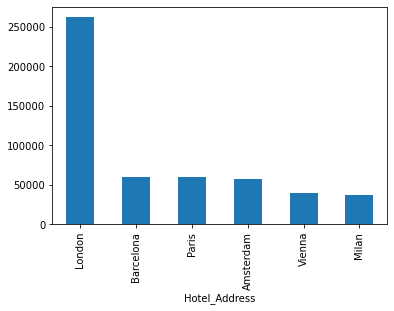

In [45]:
df_clean['Hotel_Address'].value_counts().plot(kind = 'bar')


In [46]:
df_clean['Reviewer_Nationality'].value_counts()

Reviewer_Nationality
UK           245246
Other        188307
USA           35437
Australia     21686
Ireland       14827
UAE           10235
Name: count, dtype: int64

<AxesSubplot:xlabel='Reviewer_Nationality'>

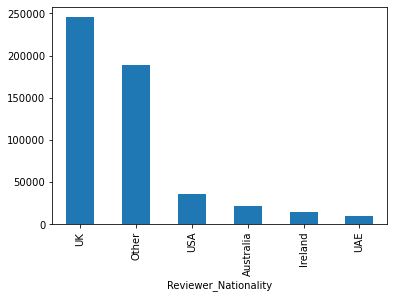

In [47]:
df_clean['Reviewer_Nationality'].value_counts().plot(kind = 'bar')

In [48]:
df_clean['Nights_Stayed'].value_counts()

Nights_Stayed
1     193645
2     134129
3      95821
4      47817
5      20845
6       9776
7       7399
8       2502
9       1293
10       889
11       418
12       316
14       247
13       246
15       117
16        57
17        42
18        33
19        29
21        23
20        19
30        11
27        11
23        10
22        10
25         7
28         7
26         7
24         6
29         5
31         1
Name: count, dtype: int64

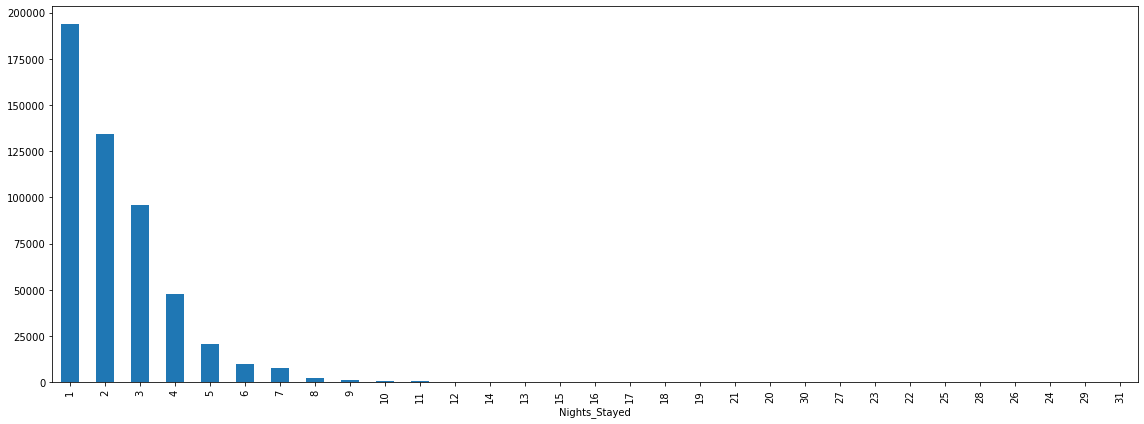

In [51]:
plt.figure(figsize=(16,6))
df_clean['Nights_Stayed'].value_counts().plot(kind = 'bar')
plt.tight_layout()


In [52]:
df_clean['Leisure_Trip'].value_counts()

Leisure_Trip
1    417778
0     97960
Name: count, dtype: int64

<AxesSubplot:xlabel='Leisure_Trip'>

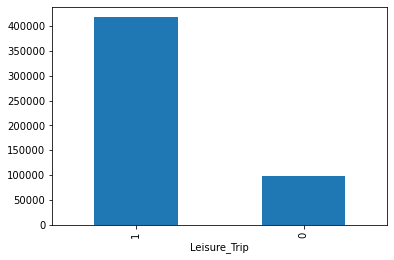

In [53]:
df_clean['Leisure_Trip'].value_counts().plot(kind = 'bar')

In [54]:
df_clean['Year'].value_counts()

Year
2016    264403
2017    156808
2015     94527
Name: count, dtype: int64

<AxesSubplot:xlabel='Year'>

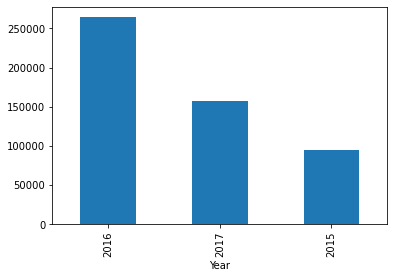

In [55]:
df_clean['Year'].value_counts().plot(kind = 'bar')

In [56]:
df_clean['Month'].value_counts()

Month
8     50672
7     49318
5     46490
10    43843
6     42896
4     42883
9     42428
1     42151
3     41110
12    39607
2     38370
11    35970
Name: count, dtype: int64

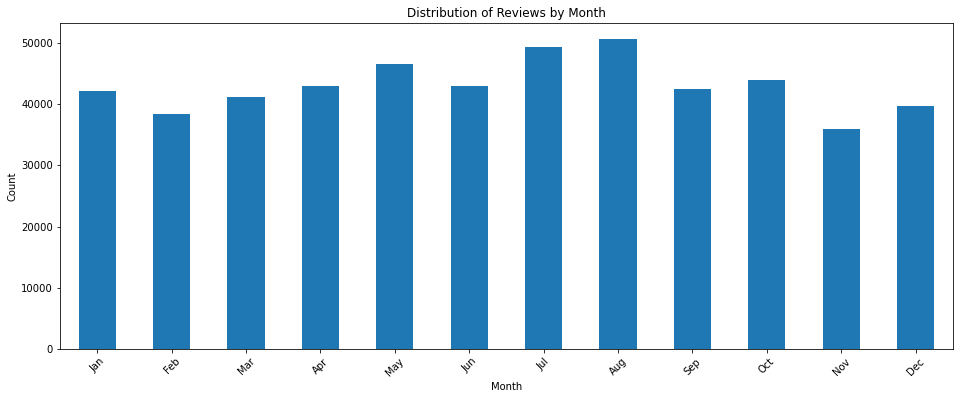

In [103]:
# Count the occurrences of each month
month_counts = df_clean['Month'].value_counts().sort_index()
plt.figure(figsize=(16,6))
# Plot
month_counts.plot(kind='bar')
plt.xlabel('Month')
plt.ylabel('Count')
plt.title('Distribution of Reviews by Month')

# Set the x-axis labels to month names for readability
plt.xticks(ticks=range(12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=45)

plt.show()


In [58]:
df_clean['Days_Since_Review'].value_counts()

Days_Since_Review
1      2585
322    2308
120    2284
338    1963
534    1940
       ... 
327     199
615     194
122     192
124     173
123     143
Name: count, Length: 731, dtype: int64

<AxesSubplot:ylabel='Frequency'>

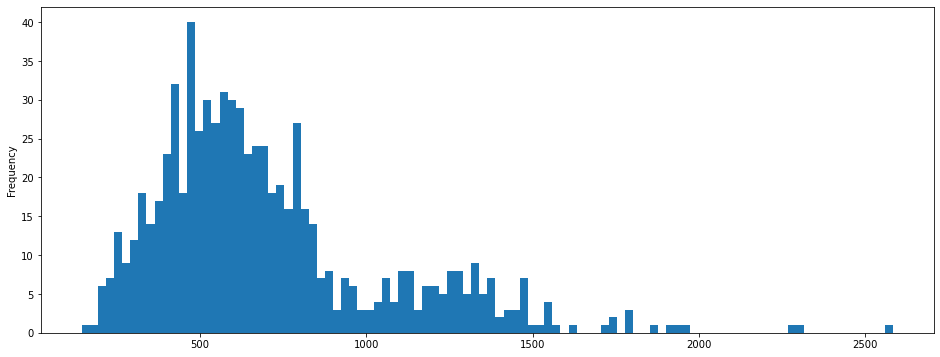

In [77]:
plt.figure(figsize=(16,6))
df_clean['Days_Since_Review'].value_counts().plot(kind = 'hist',bins=100)

In [60]:
df_clean['Reviewer_Score'].value_counts()

Reviewer_Score
1    293974
0    221764
Name: count, dtype: int64

<AxesSubplot:xlabel='Reviewer_Score'>

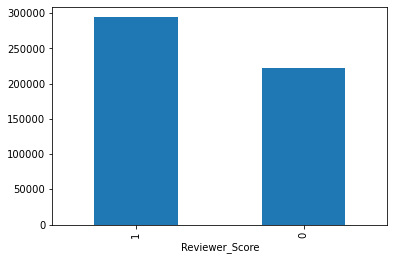

In [61]:
df_clean['Reviewer_Score'].value_counts().plot(kind = 'bar')

In [62]:
df_clean['Total_Number_of_Reviews_Reviewer_Has_Given'].value_counts()

Total_Number_of_Reviews_Reviewer_Has_Given
1      154640
2       67077
3       46845
4       35026
5       27629
        ...  
137         1
135         1
181         1
186         1
164         1
Name: count, Length: 198, dtype: int64

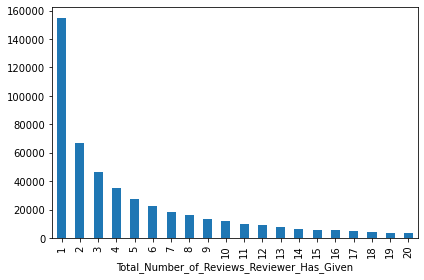

In [73]:
df_clean['Total_Number_of_Reviews_Reviewer_Has_Given'].value_counts().head(20).plot(kind = 'bar')
plt.tight_layout()

In [64]:
df_clean['Review_Total_Positive_Word_Counts'].value_counts()

Review_Total_Positive_Word_Counts
0      35946
6      26921
5      26844
4      24656
7      24538
       ...  
354        1
395        1
374        1
348        1
339        1
Name: count, Length: 365, dtype: int64

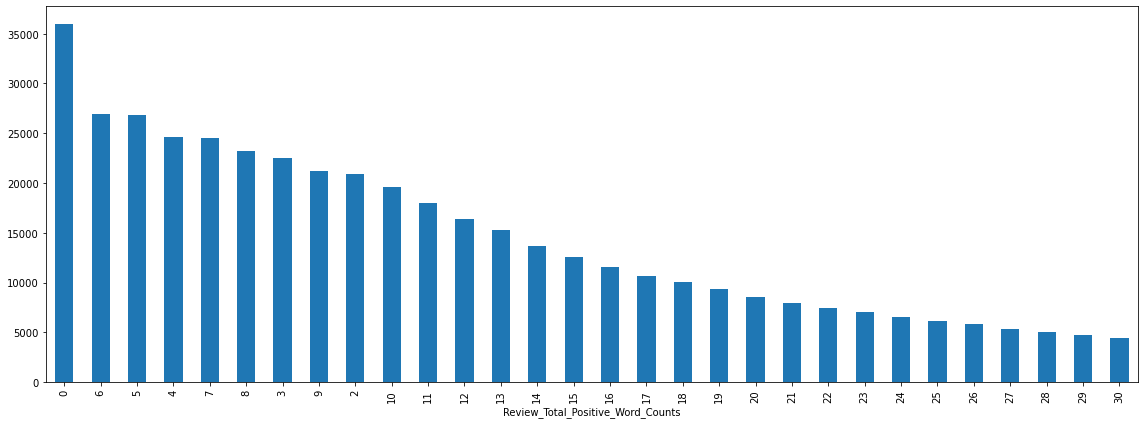

In [78]:
plt.figure(figsize=(16,6))
df_clean['Review_Total_Positive_Word_Counts'].value_counts().head(30).plot(kind = 'bar')
plt.tight_layout()

In [66]:
df_clean['Positive_Review'].value_counts()

Positive_Review
No Positive                                                                                                    35946
 Location                                                                                                       9222
 Everything                                                                                                     2284
 location                                                                                                       1677
 Nothing                                                                                                        1243
                                                                                                               ...  
 The rooms and staff were amazing                                                                                  1
 The entire package                                                                                                1
 The hotel is very clean rooms are big          

<AxesSubplot:xlabel='Positive_Review'>

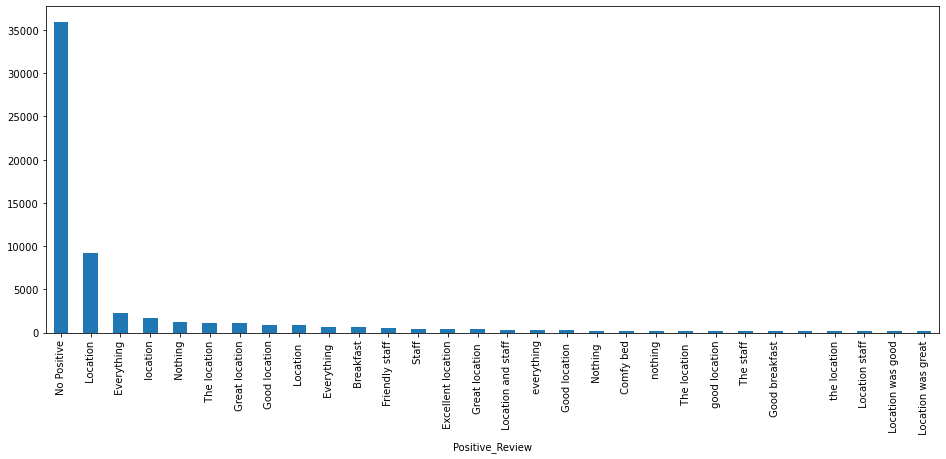

In [99]:
plt.figure(figsize=(16,6))
df_clean['Positive_Review'].value_counts().head(30).plot(kind = 'bar')

<AxesSubplot:xlabel='Positive_Review'>

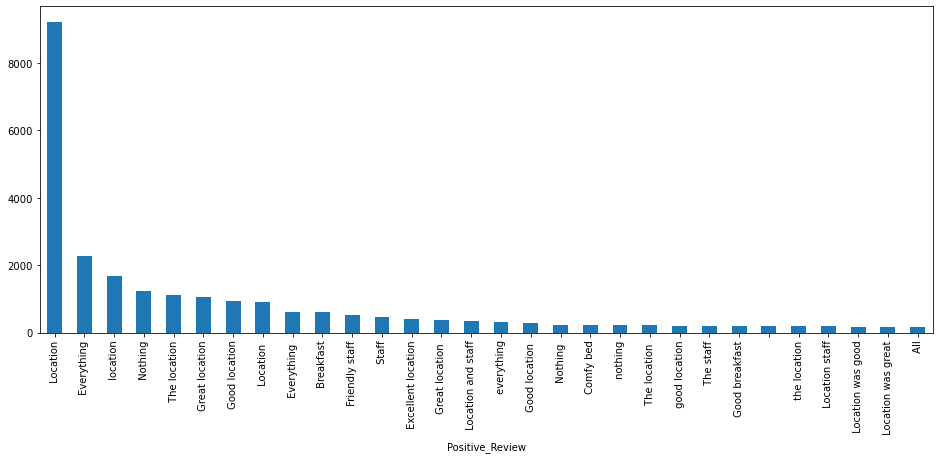

In [102]:
#remove 'No Positive' frome plot
plt.figure(figsize=(16,6))
df_clean[df_clean['Positive_Review'] != 'No Positive']['Positive_Review'].value_counts().head(30).plot(kind = 'bar')

In [80]:
df_clean['Total_Number_of_Reviews'].value_counts()

Total_Number_of_Reviews
9086     4789
9568     4256
12158    4169
7105     3578
7491     3212
         ... 
45         12
207        12
66         12
131        12
110        10
Name: count, Length: 1142, dtype: int64

<AxesSubplot:xlabel='Total_Number_of_Reviews'>

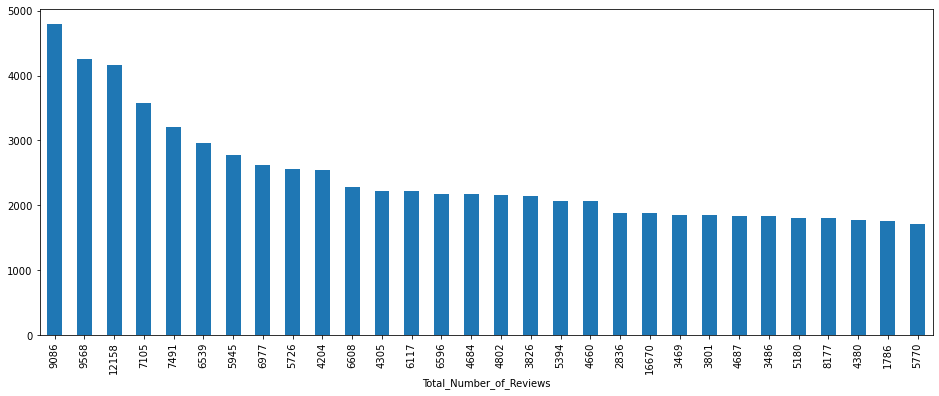

In [83]:
plt.figure(figsize=(16,6))
df_clean['Total_Number_of_Reviews'].value_counts().head(30).plot(kind = 'bar')

In [84]:
df_clean['Negative_Review'].value_counts()

Negative_Review
No Negative                                                                                                                                                                                                                127890
 Nothing                                                                                                                                                                                                                    14295
 Nothing                                                                                                                                                                                                                     4236
 nothing                                                                                                                                                                                                                     2225
 N A                                                                            

<AxesSubplot:xlabel='Negative_Review'>

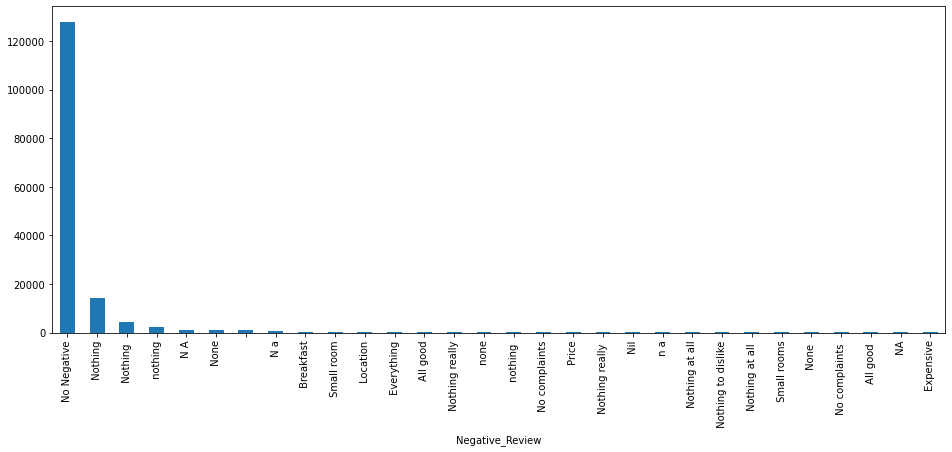

In [86]:
plt.figure(figsize=(16,6))
df_clean['Negative_Review'].value_counts().head(30).plot(kind = 'bar')

In [87]:
df_clean['Average_Score'].value_counts()


Average_Score
8.4    41222
8.1    38122
8.5    38066
8.7    37798
8.6    36945
8.2    34847
8.3    32880
8.8    30836
8.9    28520
8.0    22342
9.1    21379
9.0    21051
7.8    19895
7.9    15194
7.5    13720
9.2    12935
9.3    12659
7.7    11829
9.4     9339
7.1     6780
7.6     6684
7.4     6300
7.3     3997
7.0     3899
6.9     1737
6.8     1335
9.5     1207
6.4     1163
6.7      965
9.6      915
7.2      684
6.6      400
5.2       65
9.8       28
Name: count, dtype: int64

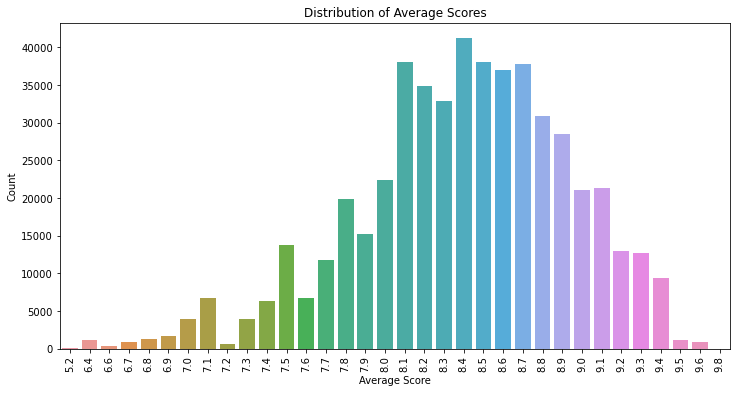

In [91]:
plt.figure(figsize=(12, 6))  # Set the size of the plot
sns.countplot(x='Average_Score', data=df_clean)

plt.xlabel('Average Score')  # Set the x-axis label
plt.ylabel('Count')          # Set the y-axis label
plt.title('Distribution of Average Scores')  # Set the title of the plot

plt.xticks(rotation=90)  # Rotate the x-axis labels for better readability if needed

plt.show()

In [93]:

df_clean['Additional_Number_of_Scoring'].value_counts()

Additional_Number_of_Scoring
2682    4789
2288    4256
2623    4169
1831    3578
1936    3212
        ... 
7         56
5         39
17        24
1         13
4         12
Name: count, Length: 480, dtype: int64

<Figure size 864x432 with 0 Axes>

<AxesSubplot:xlabel='Additional_Number_of_Scoring'>

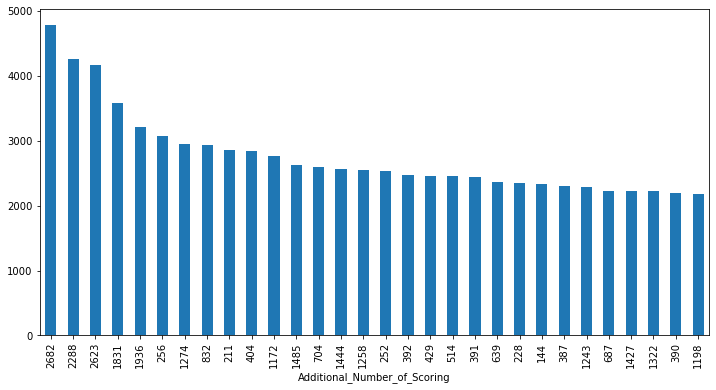

In [94]:
plt.figure(figsize=(12, 6))  # Set the size of the plot
df_clean['Additional_Number_of_Scoring'].value_counts().head(30).plot(kind = 'bar')

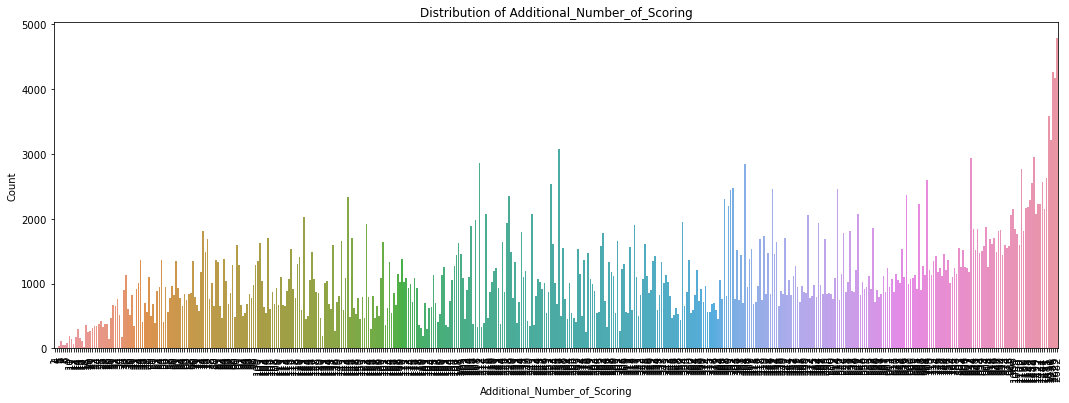

In [96]:
plt.figure(figsize=(18, 6))  # Set the size of the plot
sns.countplot(x='Additional_Number_of_Scoring', data=df_clean)

plt.xlabel('Additional_Number_of_Scoring')  # Set the x-axis label
plt.ylabel('Count')          # Set the y-axis label
plt.title('Distribution of Additional_Number_of_Scoring')  # Set the title of the plot

plt.xticks(rotation=90)  # Rotate the x-axis labels for better readability if needed

plt.show()

2. Text Data Analysis
Since you have text data (Negative_Review, Positive_Review), you might want to explore:

Word Count Analysis: Look at the most common words in the reviews. This can be done using a word cloud or frequency distribution.
Sentiment Analysis: You could analyze the sentiment of the reviews. This might be particularly interesting to compare against the Reviewer_Score.
3. Data Distribution and Trends
Score Distributions: Plot histograms or boxplots for Average_Score and Reviewer_Score to understand their distribution.
Time Series Analysis: Since you have Day, Month, and Year, you can look at trends over time. Are scores improving or declining? Are there seasonal patterns?
4. Correlation Analysis
Investigate correlations between numerical variables, especially between scores and word counts, using a correlation matrix and heatmap.
5. Categorical Data Analysis
For Reviewer_Nationality and Hotel_Address, you can explore which nationalities are most common and which hotels (or locations) are reviewed most frequently.
Leisure_Trip: Analyze the proportion of leisure trips versus other types of trips.
6. Geographical Analysis
With Latitude and Longitude, you could create geographical plots to see where the hotels are located and if location correlates with scores.
7. Review Length Analysis
Analyze the relationship between review length (Review_Total_Negative_Word_Counts and Review_Total_Positive_Word_Counts) and scores.

In [154]:
df_raw.head(1)

,Unnamed: 0,Additional_Number_of_Scoring,Average_Score,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Days_Since_Review,Latitude,Longitude,Day,Month,Year,Leisure_Trip,Nights_Stayed
0,0,194,7.7,I am so angry that i made this post available...,397,1403,Only the park outside of the hotel was beauti...,11,7,0,0,52.360576,4.915968,3,8,2017,1,6


In [155]:
df_clean.head(1)

,Unnamed: 0,Additional_Number_of_Scoring,Average_Score,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Days_Since_Review,Latitude,Longitude,Day,Month,Year,Leisure_Trip,Nights_Stayed
0,0,194,7.7,I am so angry that i made this post available...,397,1403,Only the park outside of the hotel was beauti...,11,7,0,0,52.360576,4.915968,3,8,2017,1,6


In [ ]:
df_eda 

In [ ]:
df_feat

In [ ]:
df_train